In [ ]:
# [CH2] - 개인 과제
# 2. **비지도학습 과제** :: 고객 세분화 분석

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [80]:
# 컬럼 명칭 변경
df = df.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Score"})

# 컬럼 삭제
df = df.drop(['CustomerID'], axis=1)

# 레이블 인코딩 (Male: 1, Female: 0)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# 스케일링
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,Gender,Age,Income,Score
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


c:\Users\Mosekim\anaconda3\envs\sparta-quest\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


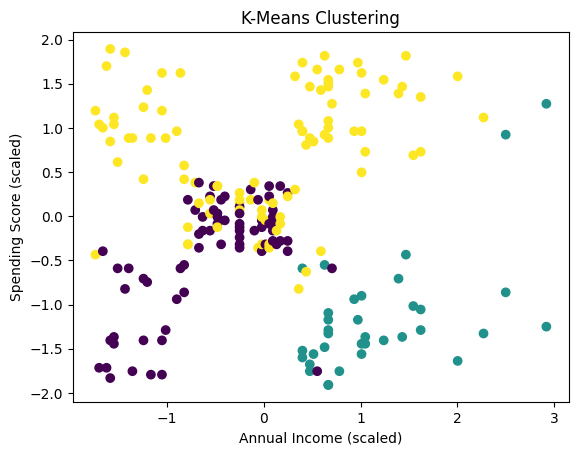

In [81]:
# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(df)

# 결과 시각화 (두 변수 기준)
plt.scatter(df['Income'], df['Score'], c=df['kmeans_labels'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

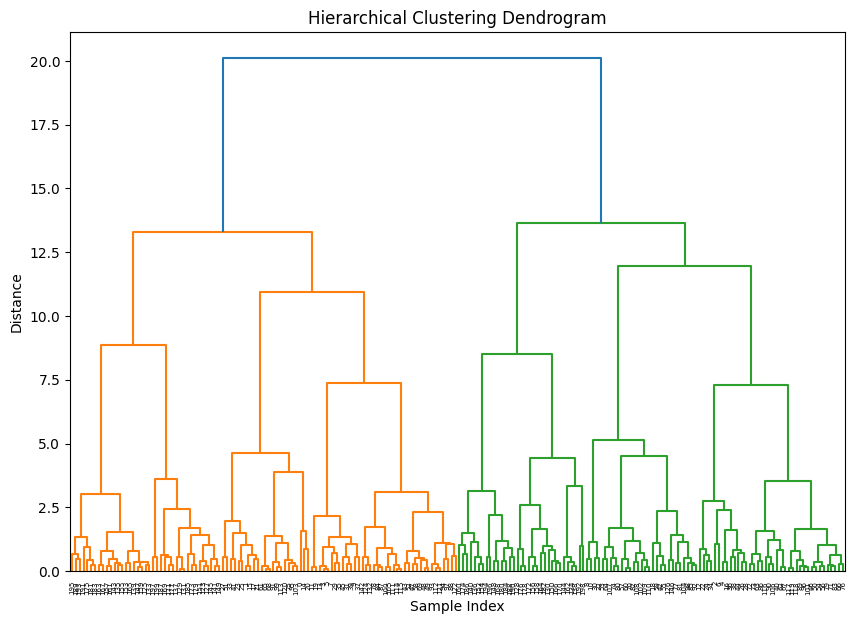

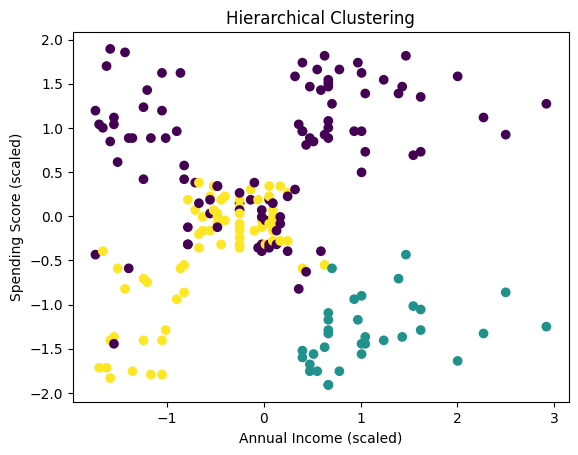

In [82]:
# 계층적 군집화 수행
linked = linkage(df[numerical_cols], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 특정 거리 기준으로 클러스터 할당
df['hierarchical_labels'] = fcluster(linked, t=3, criterion='maxclust')

# 결과 시각화
plt.scatter(df['Income'], df['Score'], c=df['hierarchical_labels'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

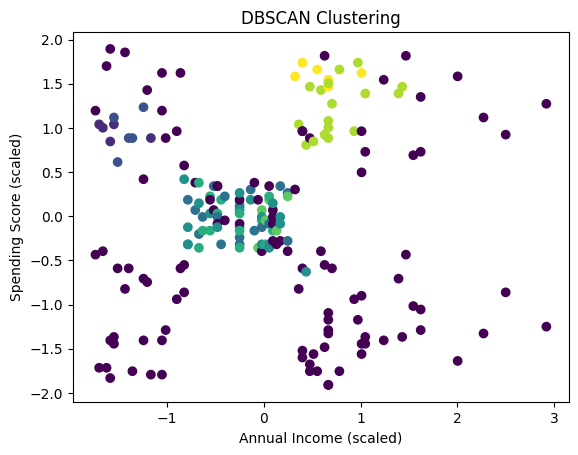

In [84]:
# DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_labels'] = dbscan.fit_predict(df)

# 결과 시각화
plt.scatter(df['Income'], df['Score'], c=df['dbscan_labels'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()